In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import re
from pathlib import Path
from datetime import datetime

sns.set(style="whitegrid")

# Grab all result CSV files
files = glob.glob("../results/*.csv")

records = []

for filepath in files:
    filename = Path(filepath).stem  # e.g., basic_dmalloc_onlysmall_amount1000_size1

    # Match with optional _onlysmall suffix
    match = re.match(
        r"(?P<benchmark>\w+?)_(?P<allocator>\w+?)(?P<onlysmall>_onlysmall)?_amount(?P<amount>\d+)(?:_size(?P<size>\d+))?",
        filename
    )
    if not match:
        print(f"Skipping unrecognized file: {filename}")
        continue

    meta = match.groupdict()
    benchmark = meta["benchmark"]
    allocator = meta["allocator"]
    amount = int(meta["amount"])
    size = int(meta["size"]) if meta["size"] else None
    onlysmall = meta["onlysmall"] is not None

    mode = f"{allocator}_onlysmall" if onlysmall else allocator

    # Read CSV, skip command row
    df = pd.read_csv(filepath)

    row = df.iloc[0]  # Only one row per file

    records.append({
        "benchmark": benchmark,
        "allocator": allocator,
        "mode": mode,
        "amount": amount,
        "size": size,
        "mean": float(row["mean"]),
        "stddev": float(row["stddev"]),
        "min": float(row["min"]),
        "max": float(row["max"]),
    })

# Create DataFrame
df = pd.DataFrame(records)

# For plotting: treat missing sizes as a separate case (e.g. varying_allocs)
df["size"] = df["size"].fillna(-1)

# Set up the output directory
today = datetime.now().strftime("%Y-%m-%d")
output_dir = f"./benchmark_result_graphs/{today}/time"
os.makedirs(output_dir, exist_ok=True)

modes = df["mode"].unique()
palette = sns.color_palette("tab10", n_colors=len(modes))
color_mapping = dict(zip(sorted(modes), palette))

for benchmark in df["benchmark"].unique():
    bench_df = df[df["benchmark"] == benchmark]

    for size in sorted(bench_df["size"].unique()):
        size_df = bench_df[bench_df["size"] == size]

        plt.figure(figsize=(10, 6))
        sns.lineplot(
            data=size_df,
            x="amount",
            y="mean",
            hue="mode",
            marker="o",
            palette=color_mapping,
        )

        title_size = " (varying sizes)" if size == -1 else f" (size={size} bytes)"
        plt.title(f"{benchmark}{title_size}")
        plt.xlabel("Amount of Allocations")
        plt.ylabel("Mean Time (s)")
        plt.legend(title="Allocator Mode")
        plt.tight_layout()

        # Prepare filename-safe benchmark name
        safe_benchmark = benchmark.replace("/", "_").replace(" ", "_")
        size_str = "varying" if size == -1 else str(size)
        file_name = f"{safe_benchmark}_size_{size_str}.png"
        file_path = os.path.join(output_dir, file_name)

        plt.savefig(file_path)
        plt.show()
        plt.close()


/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


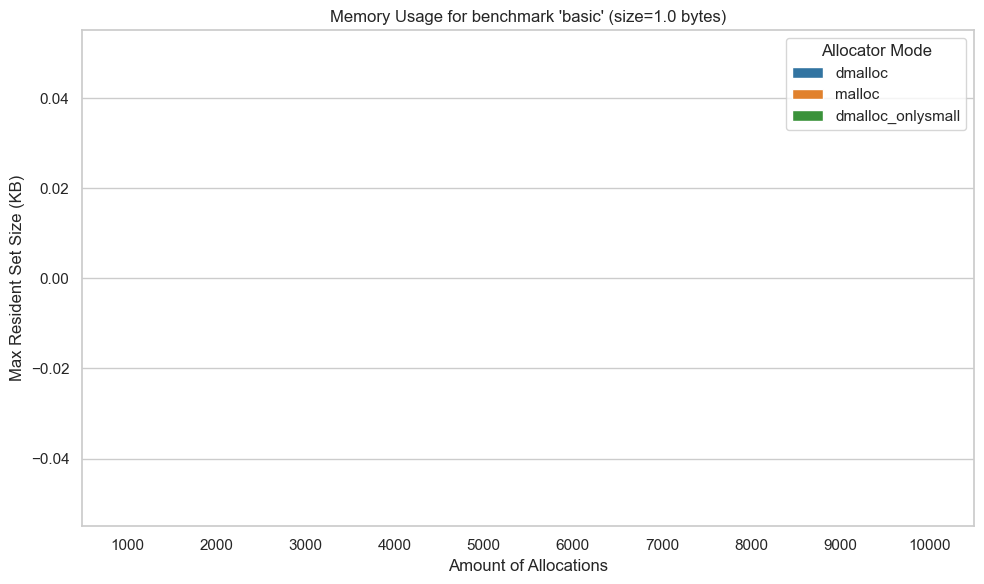

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


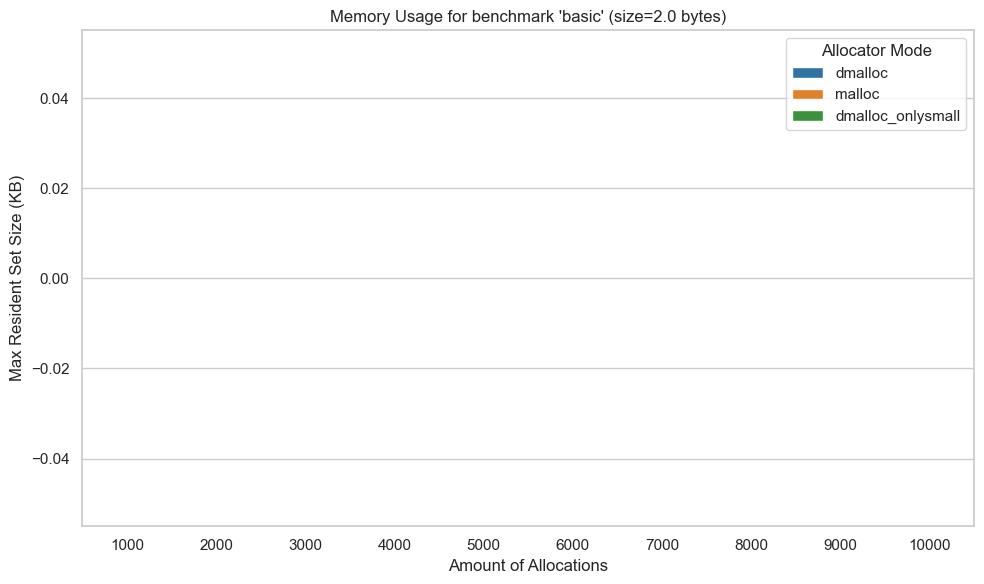

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


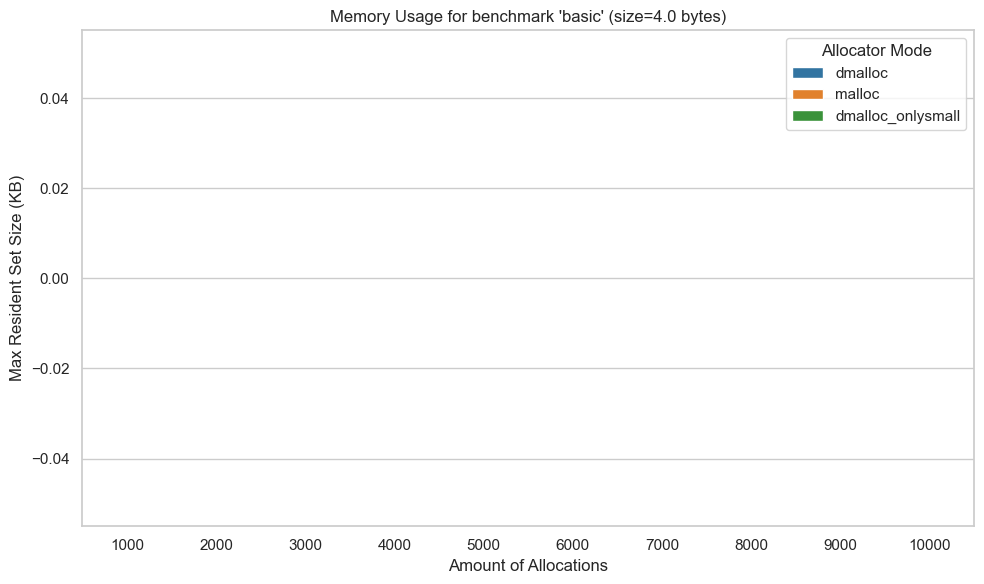

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


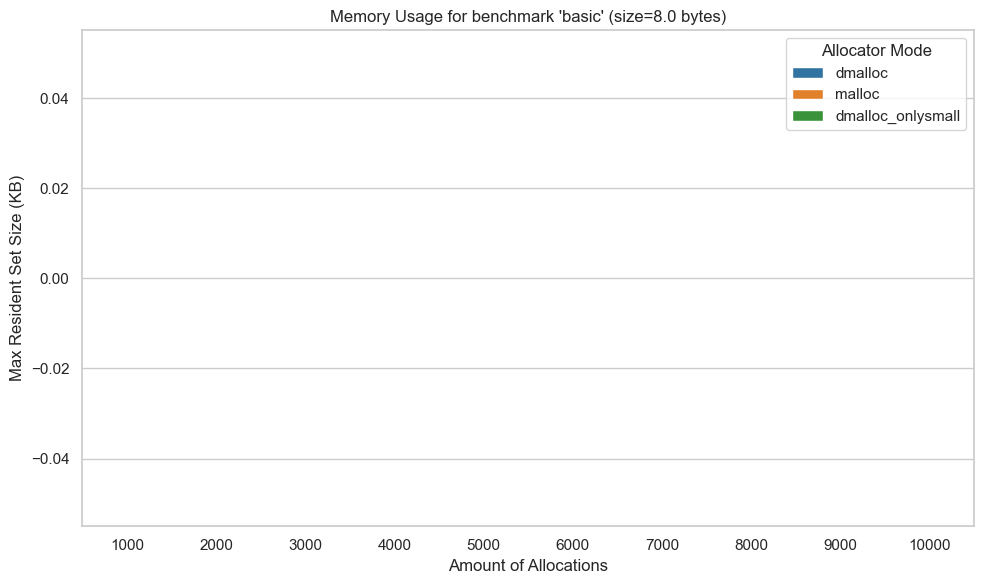

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


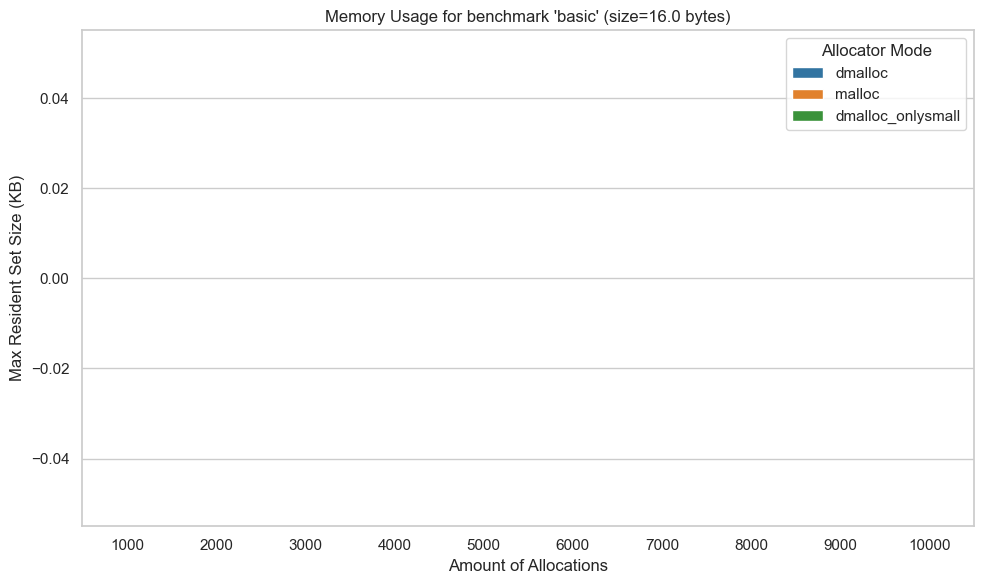

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


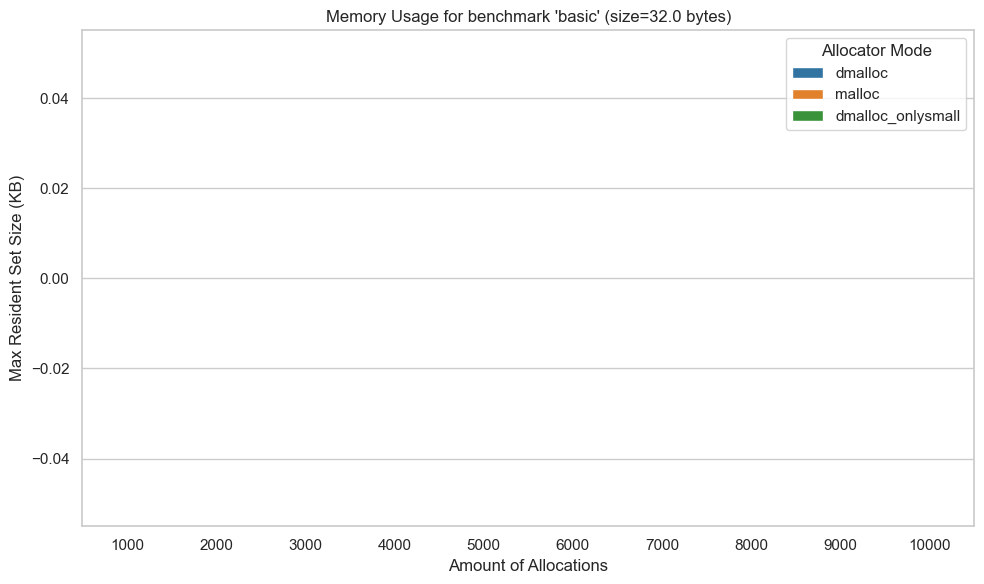

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


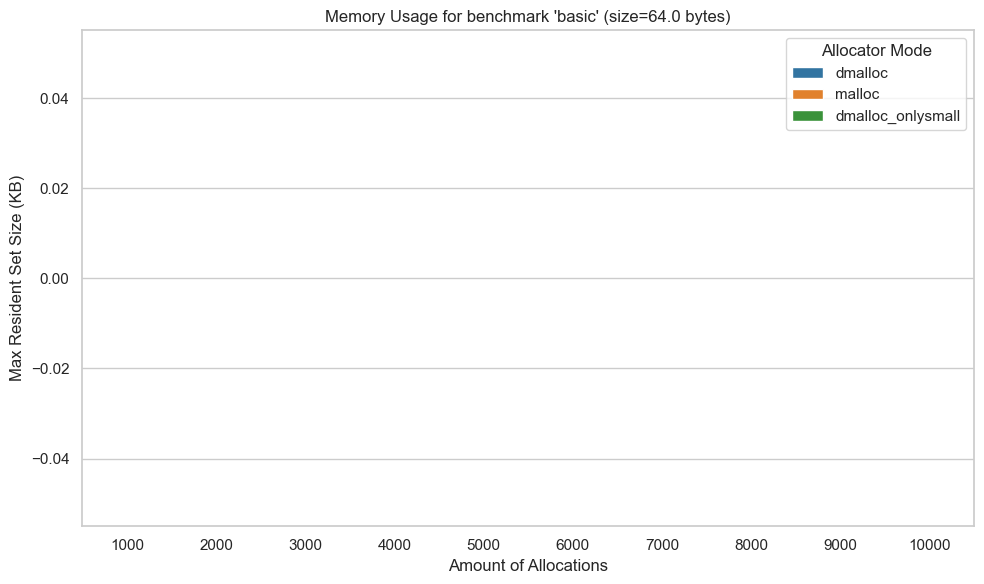

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


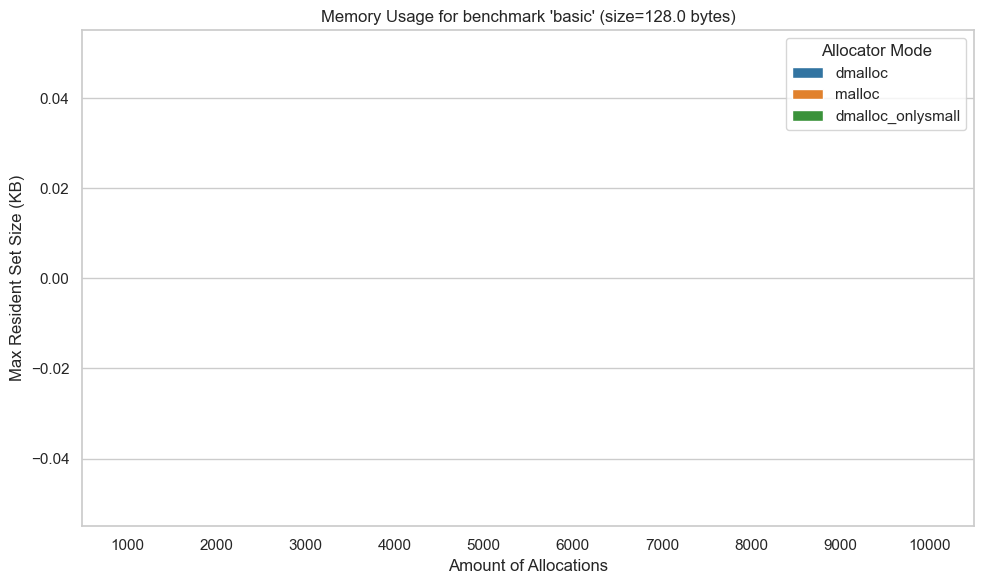

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


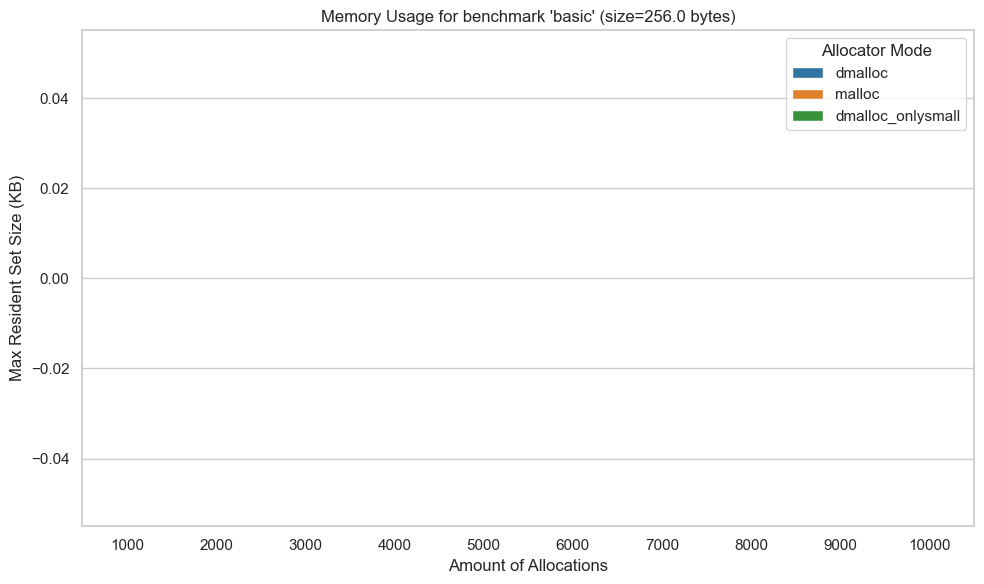

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


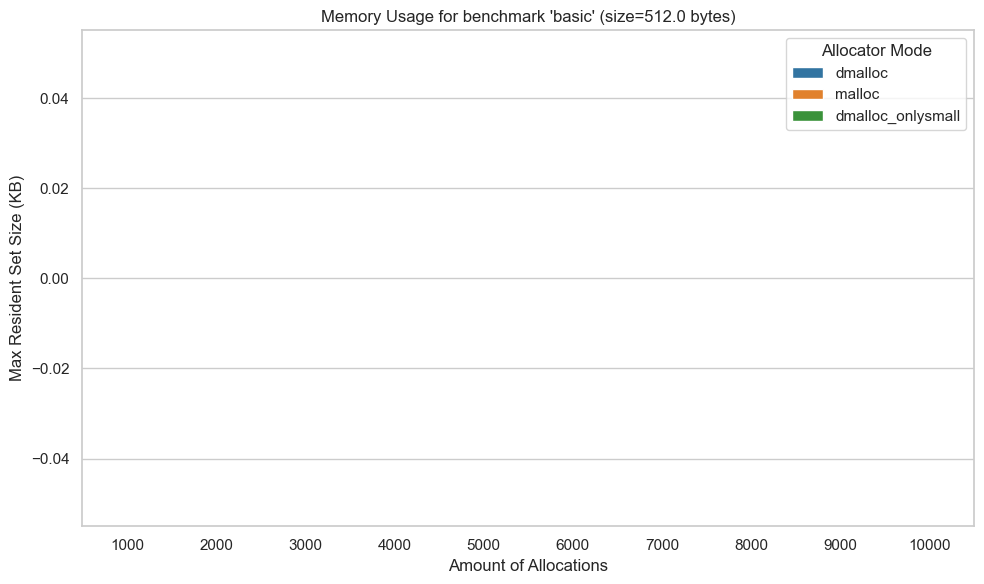

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


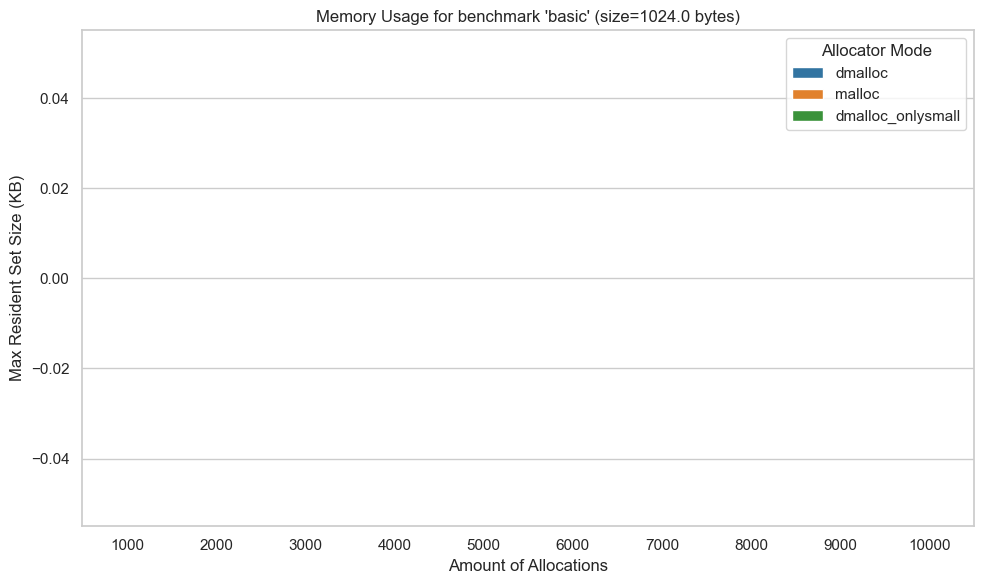

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


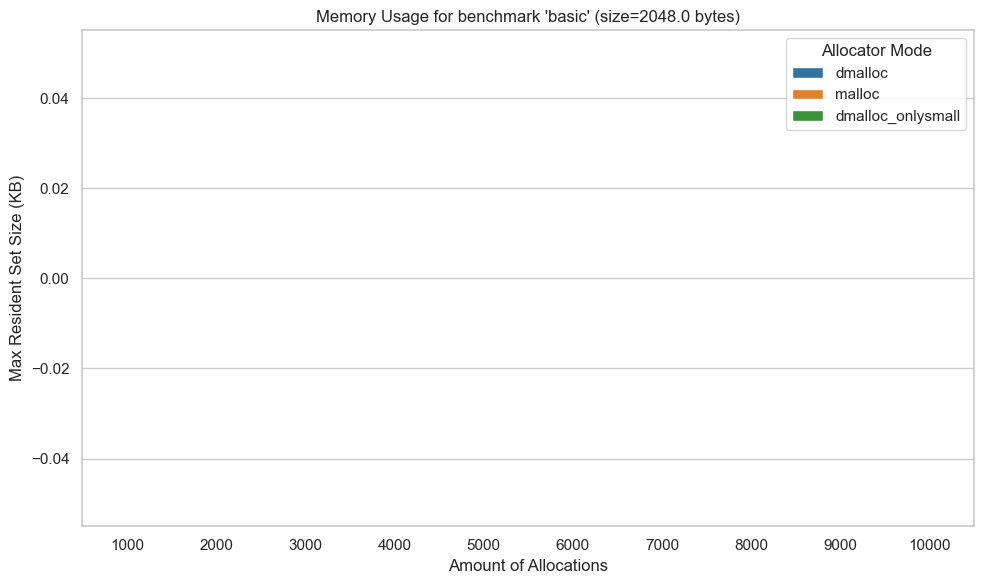

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


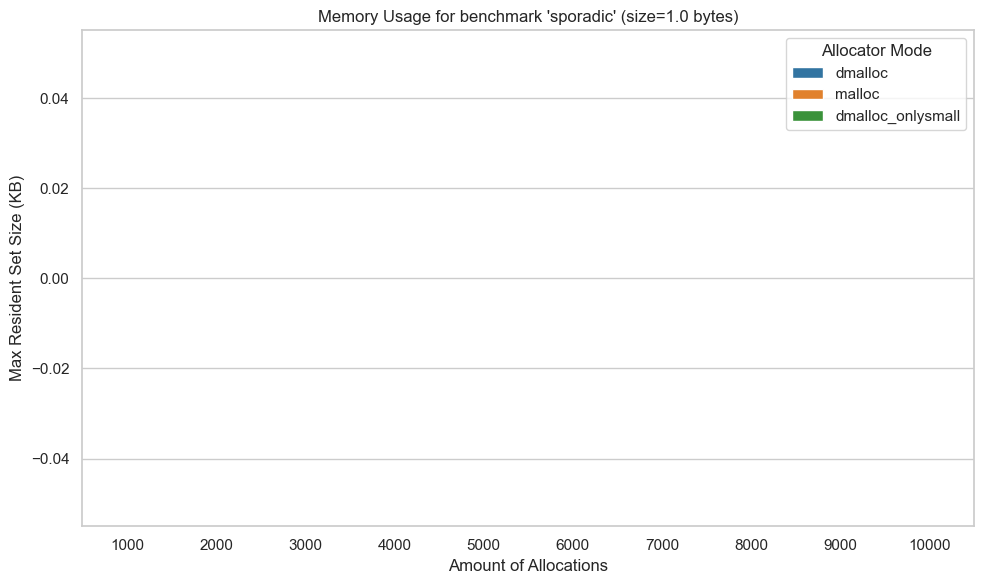

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


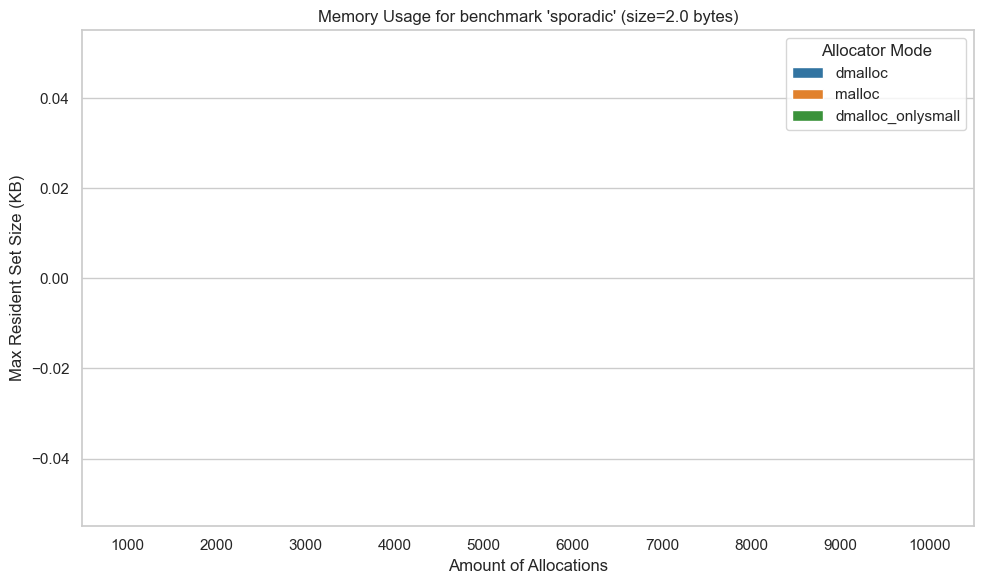

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


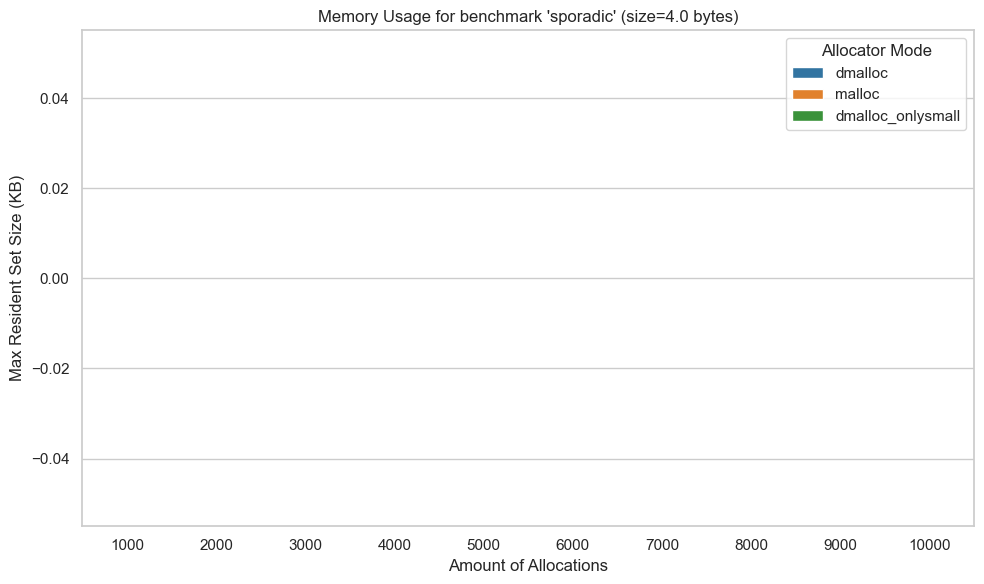

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


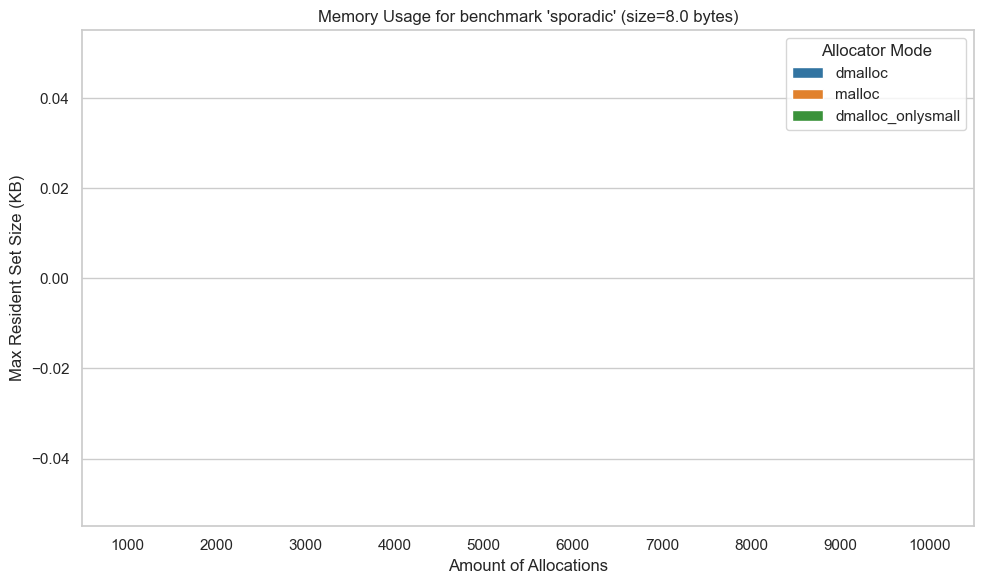

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


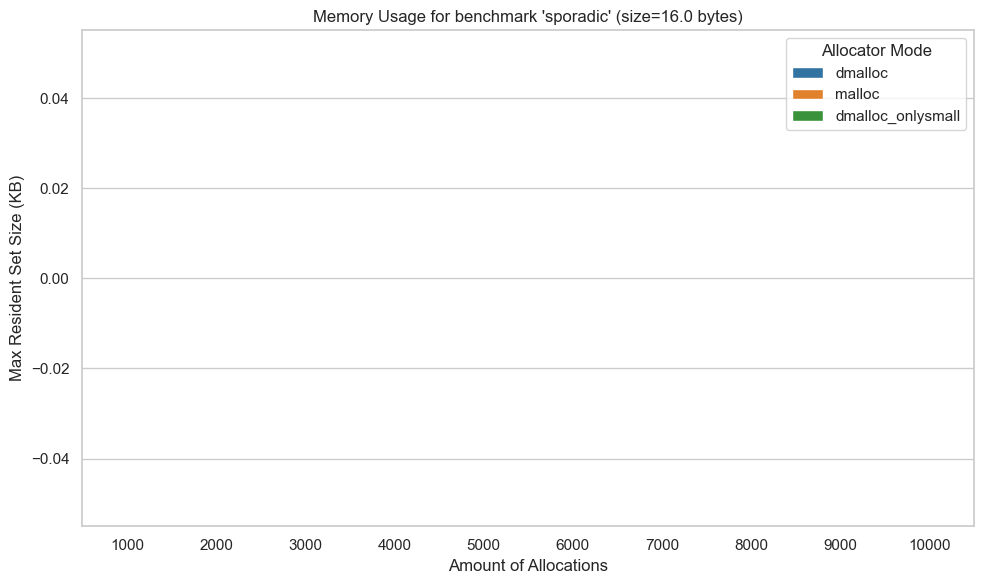

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


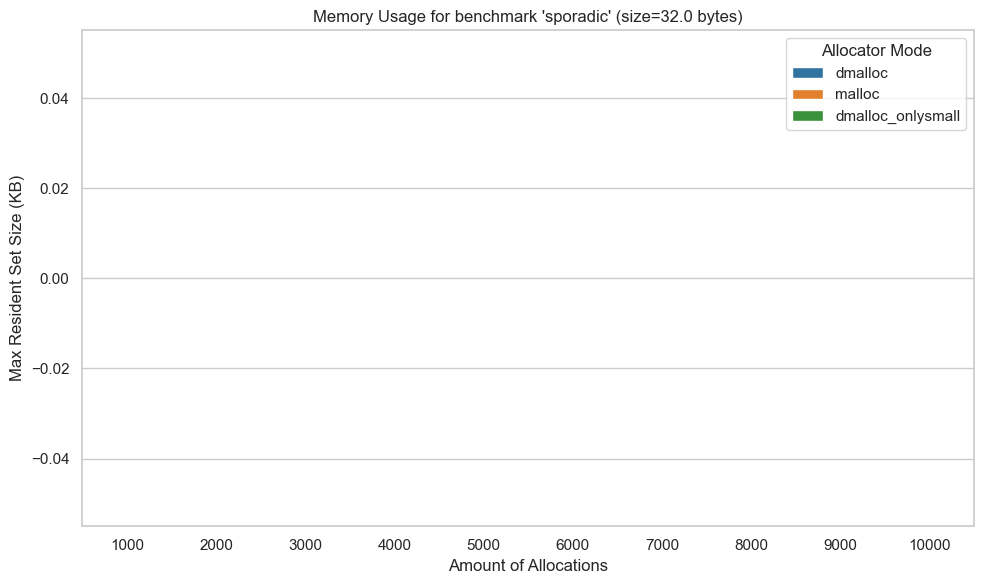

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


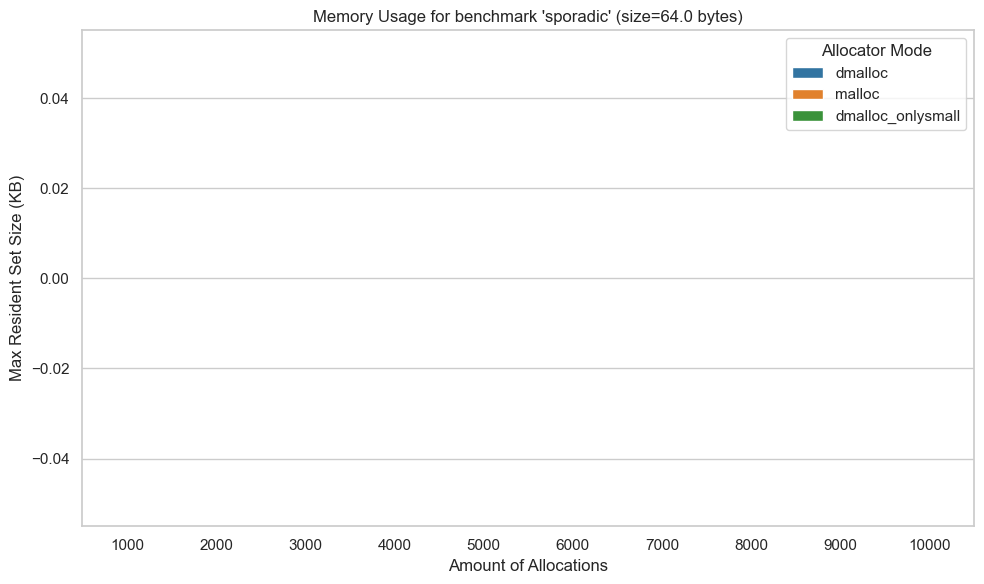

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


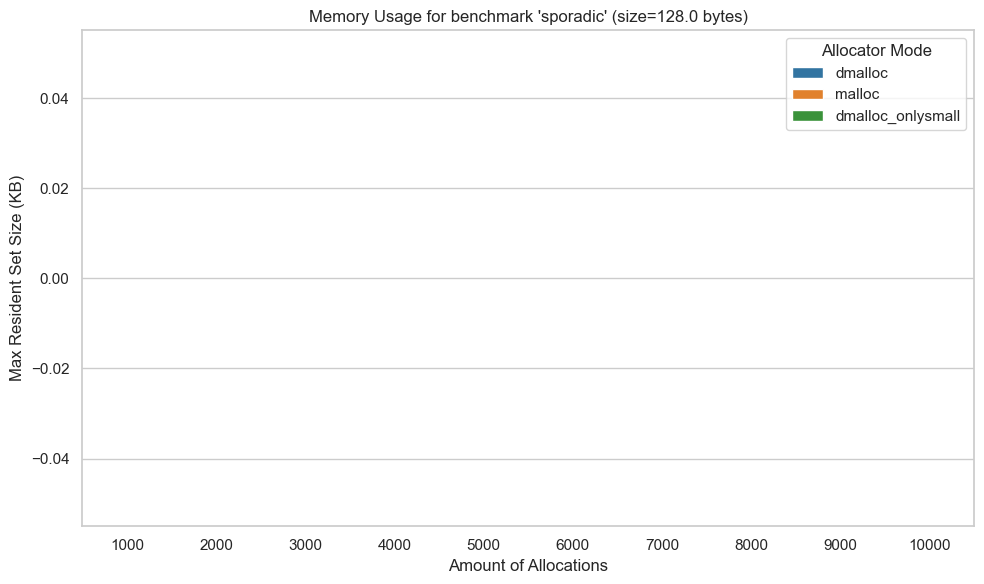

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


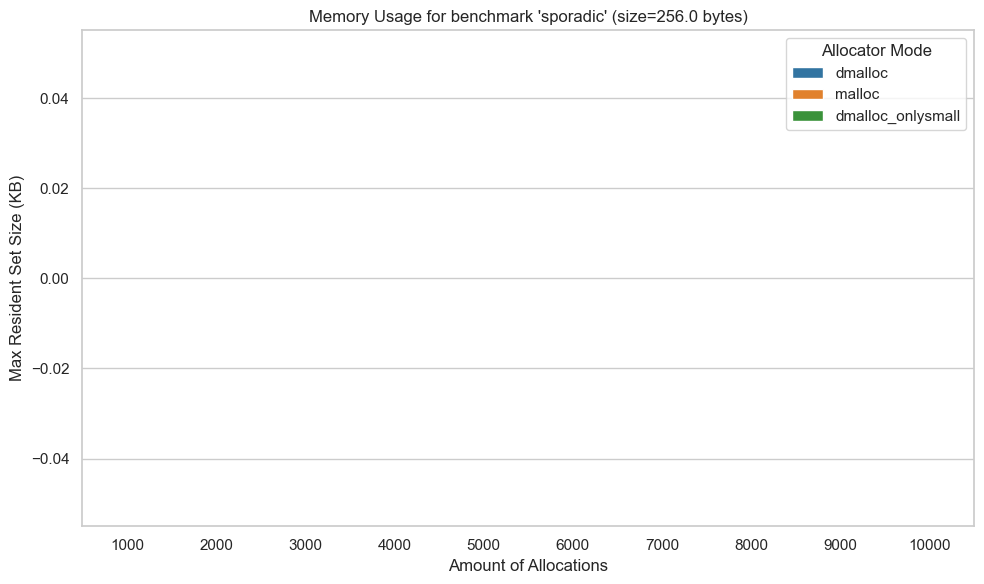

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


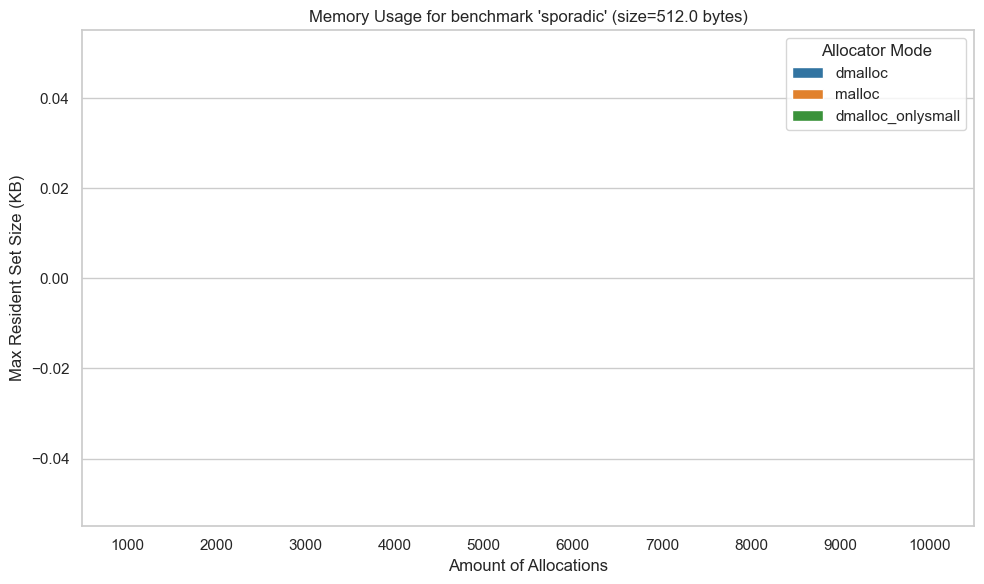

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


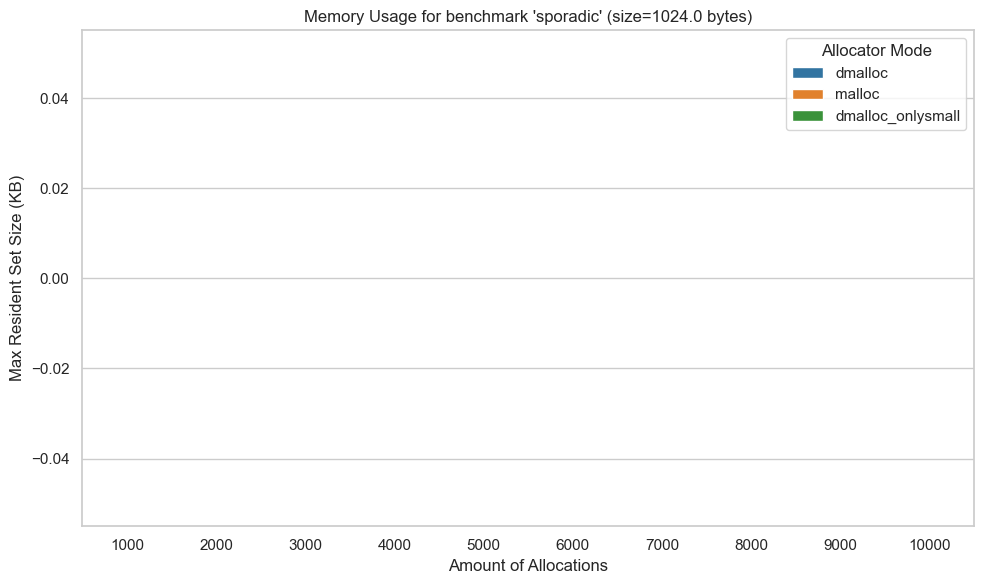

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


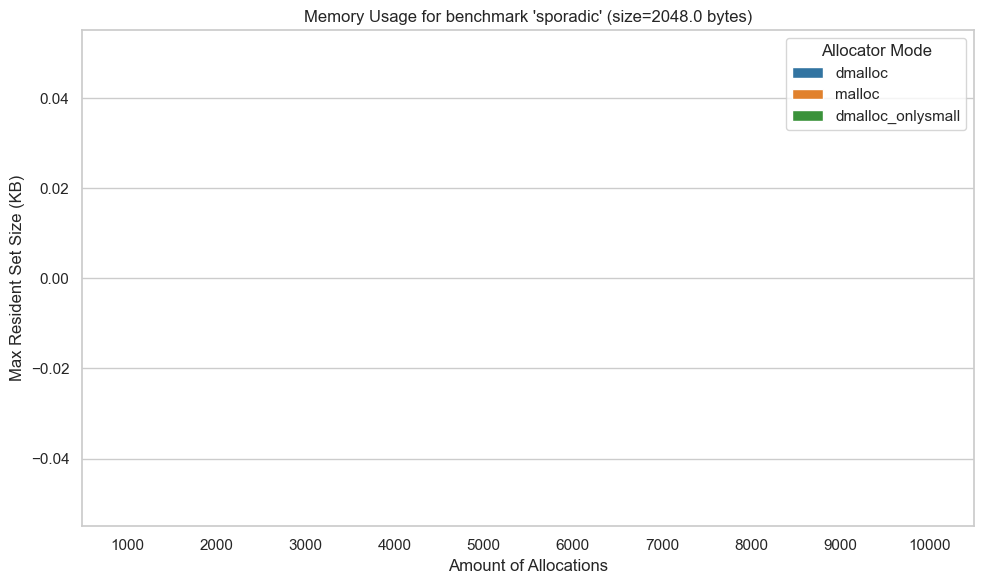

/var/folders/wc/l8w4qhc96w32k9yqd_l95d0c0000gn/T/ipykernel_46647/1409534018.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


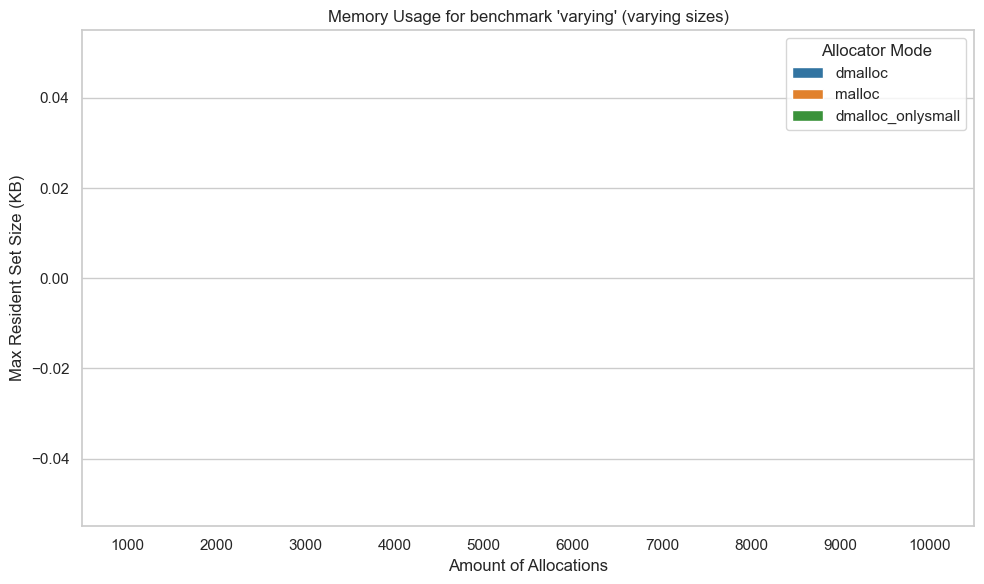

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Load memory usage CSV
csv_path = "../results/artificial_memory/memory_summary.csv"
df = pd.read_csv(csv_path)

# Fill missing size with -1 (for varying benchmarks)
if 'size' in df.columns:
    df['size'] = df['size'].fillna(-1)
else:
    df['size'] = -1

# Set up output directory
today = datetime.now().strftime("%Y-%m-%d")
output_dir = f"./benchmark_result_graphs/{today}/memory"
os.makedirs(output_dir, exist_ok=True)

sns.set(style="whitegrid")

# Plot by benchmark and size
for benchmark in df['benchmark'].unique():
    bench_df = df[df['benchmark'] == benchmark]

    for size in sorted(bench_df['size'].unique()):
        size_df = bench_df[bench_df['size'] == size]

        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=size_df,
            x='amount',
            y='max_rss_kb',
            hue='label',
            palette='tab10',
            ci='sd'
        )

        size_str = "varying sizes" if size == -1 else f"size={size} bytes"
        plt.title(f"Memory Usage for benchmark '{benchmark}' ({size_str})")
        plt.xlabel("Amount of Allocations")
        plt.ylabel("Max Resident Set Size (KB)")
        plt.legend(title="Allocator Mode")
        plt.tight_layout()

        filename = f"{benchmark}_size_{size if size != -1 else 'varying'}.png"
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath)
        plt.show()
        plt.close()
